In [1]:
import ehrapy as ep

In [2]:
base_path = "../anndata_objects/cohort_tracker"
adata_full = ep.io.read_h5ad(f"{base_path}/full_pic_dataset_1.h5ad")
adata_respiratory = ep.io.read_h5ad(f"{base_path}/respiratory_diseases_anndata_2.h5ad")
adata_pneumonia = ep.io.read_h5ad(f"{base_path}/adata_pneumonia_unspecified_3.h5ad")

In [3]:
# simple workaround for tracking patients rather than admissions
df_obs = adata_full.obs
df_unique_obs = df_obs.drop_duplicates(subset="SUBJECT_ID", keep="first")
adata_subset_full = adata_full[df_unique_obs.index, :].copy()

In [4]:
df_obs = adata_respiratory.obs
df_unique_obs = df_obs.drop_duplicates(subset="SUBJECT_ID", keep="first")
adata_subset_resp = adata_full[df_unique_obs.index, :].copy()

In [5]:
df_obs = adata_pneumonia.obs
df_unique_obs = df_obs.drop_duplicates(subset="SUBJECT_ID", keep="first")
adata_subset_pneumonia = adata_full[df_unique_obs.index, :].copy()

In [6]:
adata = adata_subset_full

for adata_rename in [adata, adata_subset_resp, adata_subset_pneumonia]:
    adata_rename.obs.rename(
        columns={
            "ethnicity": "Ethnicity",
            "gender": "Gender",
            "insurance": "Insurance",
            "FIRST_CAREUNIT": "First care unit",
            "age_in_month": "Age",
        },
        inplace=True,
    )

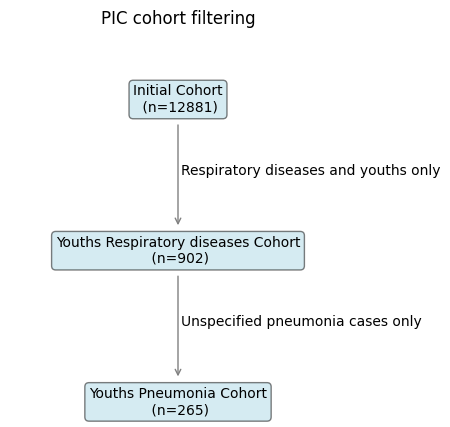

In [7]:
cohort_tracker = ep.tl.CohortTracker(
    adata, columns=["Age", "Insurance", "First care unit", "Gender", "Ethnicity"]
)
cohort_tracker(adata, label="Initial Cohort")
adata = adata_subset_resp
cohort_tracker(
    adata,
    label="Youths Respiratory diseases Cohort",
    operations_done="Respiratory diseases and youths only",
)
adata = adata_subset_pneumonia
cohort_tracker(
    adata,
    label="Youths Pneumonia Cohort",
    operations_done="Unspecified pneumonia cases only",
)

flowchart = cohort_tracker.plot_flowchart(title="PIC cohort filtering", show=False)
flowchart[0].savefig("flowchart_cohort_tracker.png", dpi=600)

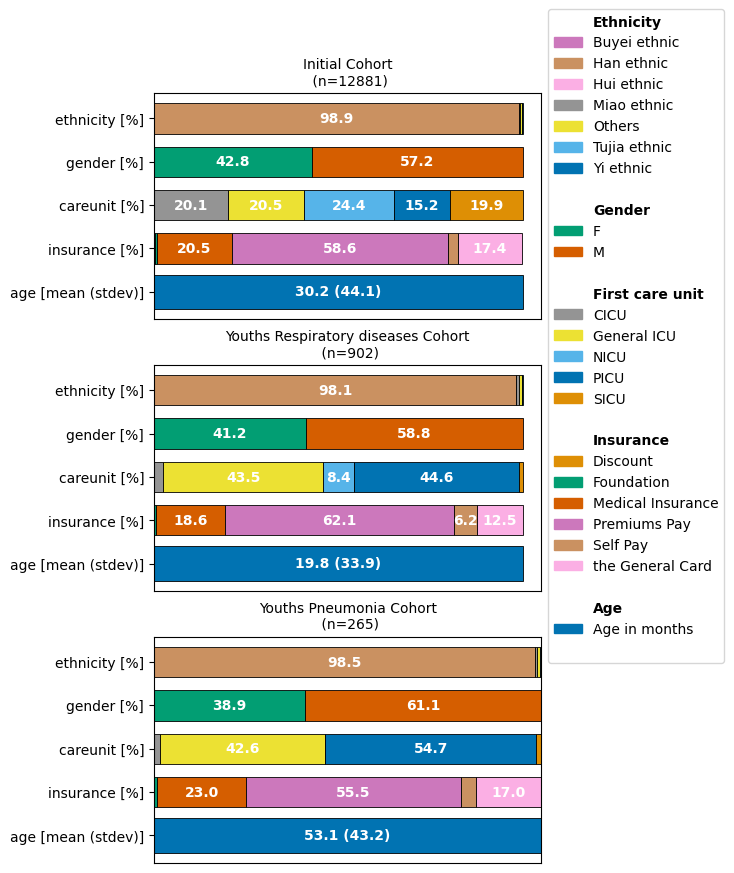

In [8]:
cohort_barplot = cohort_tracker.plot_cohort_barplot(
    subfigure_title=True,
    # color_palette="tab20",
    yticks_labels={
        "Age": "age [mean (stdev)]",
        "First care unit": "careunit [%]",
        "Insurance": "insurance [%]",
        "Ethnicity": "ethnicity [%]",
        "Gender": "gender [%]",
    },
    legend_labels={"Age": "Age in months"},
    legend_subtitles=True,
    legend_kwargs={"bbox_to_anchor": (1, 1.4)},
    subplots_kwargs={"figsize": (5, 10)},
    show=False,
)
cohort_barplot[0].savefig("barplot_cohort_tracker.png", dpi=600, bbox_inches="tight")